In [91]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_gaussian_pullback_manifold.quadratic_banana_pullback_manifold import QuadraticBananaPullbackManifold
from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

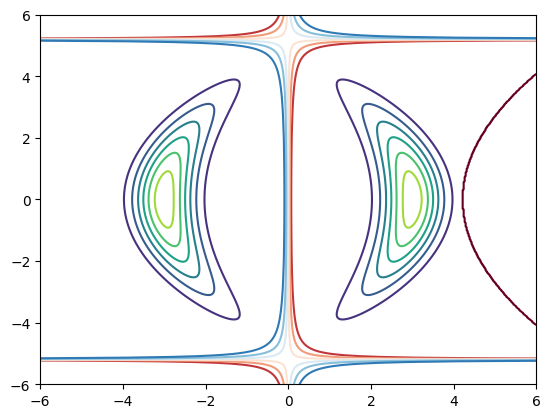

In [92]:
offset = -3.
shear = 1/9

banana_manifold_1 = QuadraticBananaPullbackManifold(shear=1/9, offset=offset)
banana_manifold_2 = QuadraticBananaPullbackManifold(shear=-shear, offset=-offset)

xx = torch.linspace(-6.0, 6.0, 500)
yy = torch.linspace(-6.0, 6.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana_1 = torch.exp(banana_manifold_1.dg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
density_banana_2 = torch.exp(banana_manifold_2.dg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
density_banana = density_banana_1 + density_banana_2
decision_boundary_1 = density_banana_1 / (density_banana_1 + density_banana_2)

plt.contour(x_grid, y_grid,decision_boundary_1, cmap='RdBu')
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [93]:
# level sets of the weights

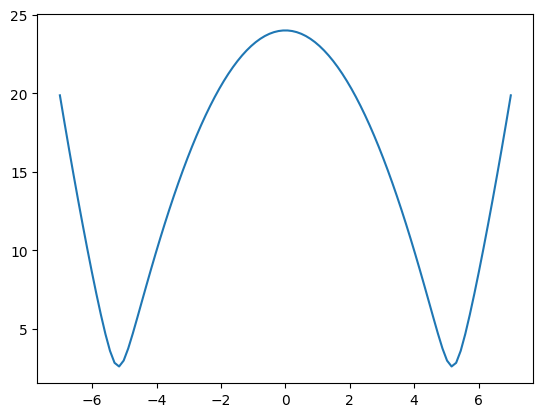

In [94]:
# plot of the geodesic loss along (0,y)
# special points
x0 = torch.tensor([offset,0.])
x1 = torch.tensor([-offset,0.])

N = 100
z = torch.zeros((N,2))
z[:,1] = torch.linspace(-7.,7.,N)

geodesic_loss = banana_manifold_1.distance(x0[None,None], z[None])[0,0] + banana_manifold_2.distance(x1[None,None], z[None])[0,0]

plt.plot(torch.linspace(-7.,7.,N), geodesic_loss)
plt.show()


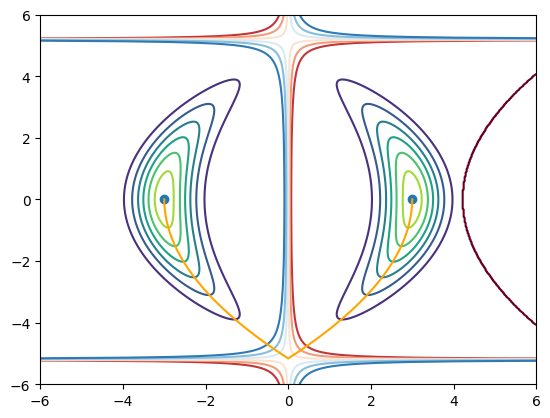

In [95]:
z_opt = z[torch.argmin(geodesic_loss)]
t = torch.linspace(0.,1.,50)

geodesic_1 = banana_manifold_1.geodesic(x0,z_opt,t)
geodesic_2 = banana_manifold_2.geodesic(z_opt,x1,t)

geodesic = torch.cat((geodesic_1,geodesic_2),0)

plt.contour(x_grid, y_grid,decision_boundary_1, cmap='RdBu')
plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic[:,0], geodesic[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/double_quadratic_banana/geodesic.eps")
plt.show()